## Análisis y visualización de datos: Comparativa entre crytomonedas y acciones

### El objetivo de este estudio es ver las diferencias y similitudes entre las cryptomonedas y acciones como activos 

### Importaciones e instalaciones

In [1]:
# %pip install cryptocompare
# %pip install yfinance
# %pip install pandas-datareader

In [2]:
import cryptocompare
import datetime
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, Checkbox
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from IPython.display import clear_output

In [3]:
#* Definimos los colores para los gráficos
colors_actives = {
        "USDP":"#6d82f2",
        "USDC":"#5a96d7",
        "BUSD":"#f0b90b",
        "AAPL":"#979797",
        "GOOG":"#EA4335",
        "MSFT":"#00A3EE",
        "BTC":"#f7931a",
        "ETH":"#716b94",
        "SOL":"#00FFA3"
        
}

### Descarga y preparación de los datos

In [43]:
#* Añadimos la clave para la API de cryptocompare
cryptocompare.cryptocompare._set_api_key_parameter('Introducir-clave-valida')

In [5]:
data_btc = cryptocompare.cryptocompare.get_historical_price_day('BTC', 'USD', toTs=datetime.datetime(2024,4,1))
yf.pdr_override()
df_btc_yf = pdr.get_data_yahoo("BTC-USD", start="2020-01-01", end="2020-04-21")
df_btc = pd.DataFrame(data_btc) 

[*********************100%%**********************]  1 of 1 completed


In [6]:
#* Cambiamos los nombres para que coincidan con los datos de yfinance
df_btc.rename(columns={"date":"Date","close":"Close","high":"High","low":"Low","open":"Open"}, inplace=True)
df_btc['Date'] = pd.to_datetime(df_btc['time'],unit='s')

#* Aplanamos el df
df_btc_yf = df_btc_yf.reset_index(drop=False)

#* Unimos los dos df
df_btc = pd.concat([df_btc_yf,df_btc], ignore_index=True)

#* Filtramos para quedarnos con los datos desde el 2020 hasta el 2024
df_filtrado_btc = df_btc.loc[(df_btc['Date'] >= "2020-01-01") & (df_btc['Date'] <= "2024-01-01")]

df_filtrado_btc = df_filtrado_btc[["Date","Close"]]

df_filtrado_btc

,Date,Close
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383
...,...,...
1457,2023-12-28,42588.940000
1458,2023-12-29,42073.590000
1459,2023-12-30,42146.030000
1460,2023-12-31,42280.140000


In [7]:

data_eth = cryptocompare.cryptocompare.get_historical_price_day('ETH', 'USD', toTs=datetime.datetime(2024,4,1))
df_eth_yf = pdr.get_data_yahoo("ETH-USD", start="2020-01-01", end="2020-04-21")
df_eth = pd.DataFrame(data_eth) 


[*********************100%%**********************]  1 of 1 completed


In [8]:
#* Cambiamos los nombres para que coincidan con los datos de yfinance
df_eth.rename(columns={"date":"Date","close":"Close","high":"High","low":"Low","open":"Open"}, inplace=True)
df_eth['Date'] = pd.to_datetime(df_eth['time'],unit='s')

#* Aplanamos el df
df_eth_yf = df_eth_yf.reset_index(drop=False)

#* Unimos los dos df
df_eth = pd.concat([df_eth_yf,df_eth], ignore_index=True)

#* Filtramos para quedarnos con los datos desde el 2020 hasta el 2024
df_filtrado_eth = df_eth.loc[(df_eth['Date'] >= "2020-01-01") & (df_eth['Date'] <= "2024-01-01")]

df_filtrado_eth = df_filtrado_eth[["Date","Close"]]

df_filtrado_eth

,Date,Close
0,2020-01-01,130.802002
1,2020-01-02,127.410179
2,2020-01-03,134.171707
3,2020-01-04,135.069366
4,2020-01-05,136.276779
...,...,...
1457,2023-12-28,2345.440000
1458,2023-12-29,2299.640000
1459,2023-12-30,2291.650000
1460,2023-12-31,2281.360000


In [9]:
data_sol = cryptocompare.cryptocompare.get_historical_price_day('SOL', 'USD', toTs=datetime.datetime(2024,4,1))
df_sol_yf = pdr.get_data_yahoo("SOL-USD", start="2020-01-01", end="2020-04-21")
df_sol = pd.DataFrame(data_sol) 

[*********************100%%**********************]  1 of 1 completed


In [10]:
#* Cambiamos los nombres para que coincidan con los datos de yfinance
df_sol.rename(columns={"date":"Date","close":"Close","high":"High","low":"Low","open":"Open"}, inplace=True)
df_sol['Date'] = pd.to_datetime(df_sol['time'],unit='s')

#* Aplanamos el df
df_sol_yf = df_sol_yf.reset_index(drop=False)

#* Unimos los dos df
df_sol = pd.concat([df_sol_yf,df_sol], ignore_index=True)

#* Filtramos para quedarnos con los datos desde el 2020 hasta el 2024
df_filtrado_sol = df_sol.loc[(df_sol['Date'] >= "2020-01-01") & (df_sol['Date'] <= "2024-01-01")]

df_filtrado_sol = df_filtrado_sol[["Date","Close"]]

df_filtrado_sol

,Date,Close
0,2020-04-10,0.951054
1,2020-04-11,0.776819
2,2020-04-12,0.882507
3,2020-04-13,0.777832
4,2020-04-14,0.661925
...,...,...
1357,2023-12-28,101.850000
1358,2023-12-29,106.190000
1359,2023-12-30,101.900000
1360,2023-12-31,101.730000


In [11]:
data_usdc = cryptocompare.cryptocompare.get_historical_price_day('USDC', 'USD', toTs=datetime.datetime(2024,4,1)) #* Respaldo en el sistema tradicional bancario (USD)
df_usdc = pd.DataFrame(data_usdc) 

In [12]:
df_usdc['date'] = pd.to_datetime(df_usdc['time'],unit='s')
#* Nos quedamos con las columnas de cierre y de fecha
df_filtrado_usdc = df_usdc[['close', 'date']]
#* Filtramos para quedarnos con los datos desde el 2023 hasta el 2024
df_filtrado_usdc = df_filtrado_usdc.loc[(df_filtrado_usdc['date'] >= "2023-01-01") & (df_filtrado_usdc['date'] <= "2024-01-01")]
#* Modificamos los nombres de las columnas para que encajen.
df_filtrado_usdc.rename(columns={"date":"Date","close":"Close"}, inplace=True)

df_filtrado_usdc

,Close,Date
985,1.0000,2023-01-01
986,0.9999,2023-01-02
987,1.0000,2023-01-03
988,0.9998,2023-01-04
989,0.9999,2023-01-05
...,...,...
1346,1.0000,2023-12-28
1347,1.0000,2023-12-29
1348,0.9999,2023-12-30
1349,1.0000,2023-12-31


In [13]:
data_usdp = cryptocompare.cryptocompare.get_historical_price_day('USDP', 'USD', toTs=datetime.datetime(2024,4,1)) #* Sistema de respaldo Tokens ERC-20 y NFTS
df_usdp = pd.DataFrame(data_usdp) 

In [14]:
df_usdp['date'] = pd.to_datetime(df_usdp['time'],unit='s')
#* Nos quedamos con las columnas de cierre y de fecha
df_filtrado_usdp = df_usdp[['close', 'date']]
#* Filtramos para quedarnos con los datos desde el 2023 hasta el 2024
df_filtrado_usdp = df_filtrado_usdp.loc[(df_filtrado_usdp['date'] >= "2023-01-01") & (df_filtrado_usdp['date'] <= "2024-01-01")]
#* Modificamos los nombres de las columnas para que encajen.
df_filtrado_usdp.rename(columns={"date":"Date","close":"Close"}, inplace=True)

df_filtrado_usdp

,Close,Date
985,0.9974,2023-01-01
986,0.9986,2023-01-02
987,0.9989,2023-01-03
988,0.9985,2023-01-04
989,0.9987,2023-01-05
...,...,...
1346,0.9825,2023-12-28
1347,0.9980,2023-12-29
1348,0.9899,2023-12-30
1349,1.0010,2023-12-31


In [15]:
data_busd = cryptocompare.cryptocompare.get_historical_price_day('BUSD', 'USD', toTs=datetime.datetime(2024,4,1)) #* Sistema de respaldo por Binance
df_busd = pd.DataFrame(data_busd) 

In [16]:
df_busd['date'] = pd.to_datetime(df_busd['time'],unit='s')
#* Nos quedamos con las columnas de cierre y de fecha
df_filtrado_busd = df_busd[['close', 'date']]
#* Filtramos para quedarnos con los datos desde el 2023 hasta el 2024
df_filtrado_busd = df_filtrado_busd.loc[(df_filtrado_busd['date'] >= "2023-01-01") & (df_filtrado_busd['date'] <= "2024-01-01")]
#* Modificamos los nombres de las columnas para que encajen.
df_filtrado_busd.rename(columns={"date":"Date","close":"Close"}, inplace=True)

df_filtrado_busd

,Close,Date
985,1.0000,2023-01-01
986,1.0000,2023-01-02
987,1.0000,2023-01-03
988,1.0000,2023-01-04
989,1.0000,2023-01-05
...,...,...
1346,0.9772,2023-12-28
1347,0.9772,2023-12-29
1348,0.9772,2023-12-30
1349,0.9772,2023-12-31


In [17]:
df_aapl = pdr.get_data_yahoo("AAPL", start="2019-12-31", end="2024-01-03")

[*********************100%%**********************]  1 of 1 completed


In [18]:
#* Aplanamos el dataframe
df_aapl = df_aapl.reset_index(drop=False)
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
#* Modificamos el valor del primer y último registro para que cuadre en el gráfico
df_aapl.loc[df_aapl['Date'] == '2019-12-31', 'Date'] = pd.to_datetime('2020-01-01')
df_aapl.loc[df_aapl['Date'] == '2024-01-02', 'Date'] = pd.to_datetime('2024-01-01')
#* Nos quedamos con las columnas de cierre y de fecha
df_filtrado_aapl = df_aapl[['Close', 'Date']]
df_filtrado_aapl

,Close,Date
0,73.412498,2020-01-01
1,75.087502,2020-01-02
2,74.357498,2020-01-03
3,74.949997,2020-01-06
4,74.597504,2020-01-07
...,...,...
1003,193.050003,2023-12-26
1004,193.149994,2023-12-27
1005,193.580002,2023-12-28
1006,192.529999,2023-12-29


In [19]:
df_goog = pdr.get_data_yahoo("GOOG", start="2019-12-31", end="2024-01-03")

[*********************100%%**********************]  1 of 1 completed


In [20]:
#* Aplanamos el dataframe
df_goog = df_goog.reset_index(drop=False)
df_goog['Date'] = pd.to_datetime(df_goog['Date'])
#* Modificamos el valor del primer y último registro para que cuadre en el gráfico
df_goog.loc[df_goog['Date'] == '2019-12-31', 'Date'] = pd.to_datetime('2020-01-01')
df_goog.loc[df_goog['Date'] == '2024-01-02', 'Date'] = pd.to_datetime('2024-01-01')
#* Nos quedamos con las columnas de cierre y de fecha
df_filtrado_goog = df_goog[['Close', 'Date']]
df_filtrado_goog

,Close,Date
0,66.850998,2020-01-01
1,68.368500,2020-01-02
2,68.032997,2020-01-03
3,69.710503,2020-01-06
4,69.667000,2020-01-07
...,...,...
1003,142.820007,2023-12-26
1004,141.440002,2023-12-27
1005,141.279999,2023-12-28
1006,140.929993,2023-12-29


In [21]:
df_msft = pdr.get_data_yahoo("MSFT", start="2019-12-31", end="2024-01-03")

[*********************100%%**********************]  1 of 1 completed


In [22]:
#* Aplanamos el dataframe
df_msft = df_msft.reset_index(drop=False)
df_msft['Date'] = pd.to_datetime(df_msft['Date'])
#* Modificamos el valor del primer y último registro para que cuadre en el gráfico
df_msft.loc[df_msft['Date'] == '2019-12-31', 'Date'] = pd.to_datetime('2020-01-01')
df_msft.loc[df_msft['Date'] == '2024-01-02', 'Date'] = pd.to_datetime('2024-01-01')
#* Nos quedamos con las columnas de cierre y de fecha
df_filtrado_msft = df_msft[['Close', 'Date']]
df_filtrado_msft

,Close,Date
0,157.699997,2020-01-01
1,160.619995,2020-01-02
2,158.619995,2020-01-03
3,159.029999,2020-01-06
4,157.580002,2020-01-07
...,...,...
1003,374.660004,2023-12-26
1004,374.070007,2023-12-27
1005,375.279999,2023-12-28
1006,376.040009,2023-12-29


## Gráfico 1: Comparativa precio de cierre entre Bitcoin vs Apple

Vamos a analizar como afectan los distintos sucesos: covid-19, guerra de Ucrania, caída del segundo broker de crytomonedas más importante FTX y la guerra de Israel y Palestina.

La idea es ver la tendencia en el valor de los activos y cual se ve más afectado por los distintos sucesos.

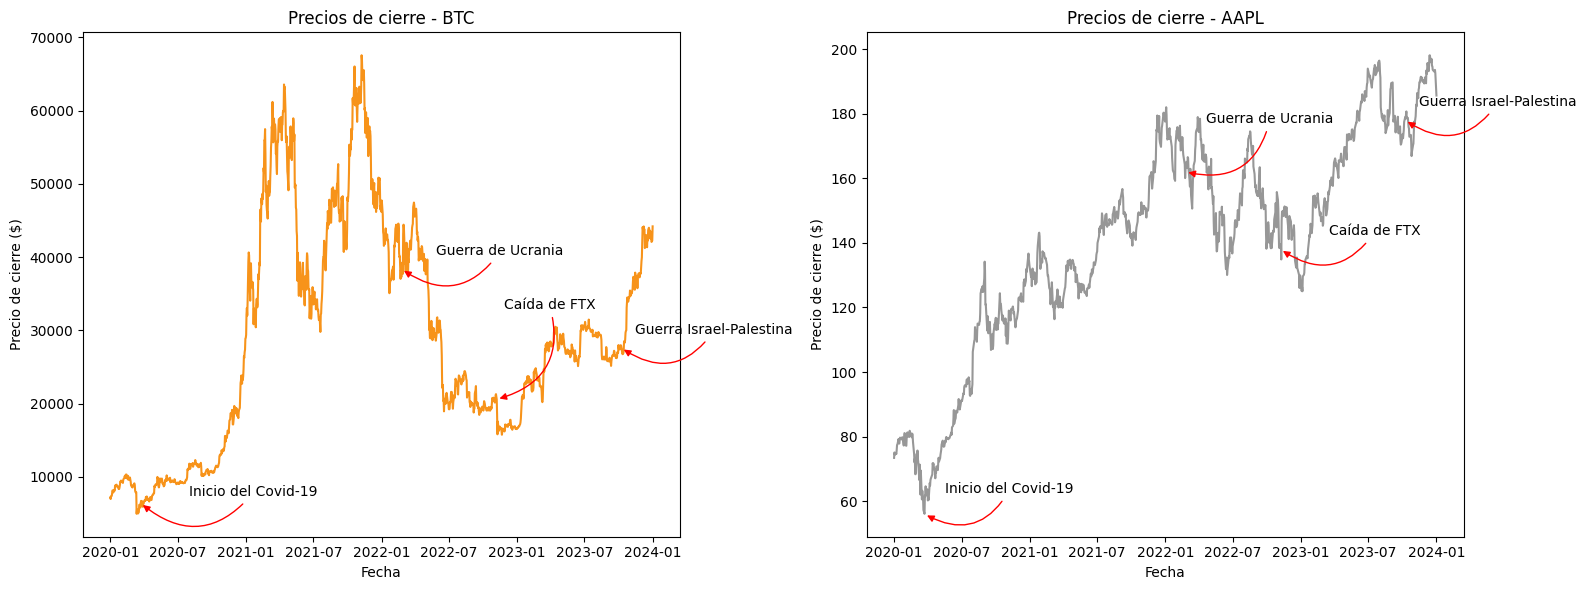

In [23]:
colors = [colors_actives["BTC"], colors_actives["AAPL"]]  
labels = ['BTC','AAPL']

text_annotate = ["Inicio del Covid-19","Guerra de Ucrania","Caída de FTX","Guerra Israel-Palestina"]

dates = [datetime.datetime(2020,3,23),datetime.datetime(2022,2,24),datetime.datetime(2022,11,7),datetime.datetime(2023,10,9)]

arrow_style = dict(arrowstyle='-|>',color="r",connectionstyle='arc3,rad=-0.5')

xytext = [(35, 5),(25, 10),(5, 65),(10,10),(15, 15),(15, 35),(35, 10),(10,10)]
xytextIndex = 0

close_values_btc = []
close_values_aapl = []

#* Insertamos los datos de cierre de cada fecha para las anotaciones
for i in range(len(text_annotate)):
    close_value_btc_aux = int(df_filtrado_btc.loc[df_filtrado_btc['Date'] == dates[i]].Close.iloc[0])
    close_value_aapl_aux = int(df_filtrado_aapl.loc[df_filtrado_aapl['Date'] == dates[i]].Close.iloc[0])
    close_values_btc.append(close_value_btc_aux)
    close_values_aapl.append(close_value_aapl_aux)

close_values = [close_values_btc,close_values_aapl]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#* Añadimos un bucle para generar el gráfico en base a los df
for i, (ax, df) in enumerate(zip(axes, [df_filtrado_btc, df_filtrado_aapl])):
    ax.plot(df['Date'], df['Close'], label=labels[i], color=colors[i])
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio de cierre ($)')
    ax.set_title(f'Precios de cierre - {labels[i]}')
    #* Generamos las anotaciones para los gráficos en las fechas indicadas
    for j in range(len(text_annotate)):
        ax.annotate(text_annotate[j], xy=(dates[j],close_values[i][j]), xytext=xytext[xytextIndex], 
                    textcoords='offset points', arrowprops=arrow_style)
        xytextIndex+= 1

plt.tight_layout()
plt.show()

Como podemos observar, estos sucesos por su gran alcance y relevancia. Afectan de manera importante a los dos activos.

Por un lado, BTC toca mínimo del 2020 cuando se declara el estado de alarma y el confinamiento en Estados Unidos. Y sufre una baja por debajo de los 20000$ cuando se descubre las irregularidades del broker FTX.

Por el otro lado, Apple sufre su mínimo en el inicio del covid-19 y aunque sufre una baja por las irregularidades del FTX, se ve más afectado por los acontecimientos bélicos como la guerra de Ucrania. 

## Comparativa de beneficio neto entre Acciones vs Crytomonedas

In [24]:
benefit_total = []
stock_names = ["AAPL","GOOG","MSFT","BTC","ETH","SOL"]

In [25]:
initial_close_aapl = df_filtrado_aapl.iloc[0].Close
final_close_aapl = df_filtrado_aapl.iloc[-1].Close

benefit_aapl_2020_2024 = int((final_close_aapl/initial_close_aapl)*100)
benefit_total.append(benefit_aapl_2020_2024)



In [26]:
initial_close_goog = df_filtrado_goog.iloc[0].Close
final_close_goog = df_filtrado_goog.iloc[-1].Close

benefit_goog_2020_2024 = int((final_close_goog/initial_close_goog)*100)
benefit_total.append(benefit_goog_2020_2024)

In [27]:
initial_close_msft = df_filtrado_msft.iloc[0].Close
final_close_msft = df_filtrado_msft.iloc[-1].Close

benefit_msft_2020_2024 = int((final_close_msft/initial_close_msft)*100)
benefit_total.append(benefit_msft_2020_2024)

In [28]:
initial_close_btc = df_filtrado_btc.iloc[0].Close
final_close_btc = df_filtrado_btc.iloc[-1].Close

benefit_btc_2020_2024 = int((final_close_btc/initial_close_btc)*100)
benefit_total.append(benefit_btc_2020_2024)

In [29]:
initial_close_eth = df_filtrado_eth.iloc[0].Close
final_close_eth = df_filtrado_eth.iloc[-1].Close

benefit_eth_2020_2024 = int((final_close_eth/initial_close_eth)*100)
benefit_total.append(benefit_eth_2020_2024)

In [30]:
initial_close_sol = df_filtrado_sol.iloc[0].Close
final_close_sol = df_filtrado_sol.iloc[-1].Close

benefit_sol_2020_2024 = int((final_close_sol/initial_close_sol)*100)
benefit_total.append(benefit_sol_2020_2024)

In [31]:
datos = {"accion":stock_names,"beneficio":benefit_total}
datos = pd.DataFrame(datos)
datos = datos.sort_values("beneficio")
datos

,accion,beneficio
1,GOOG,208
2,MSFT,235
0,AAPL,252
3,BTC,613
4,ETH,1798
5,SOL,11568


In [32]:
#* Añadimos todas las acciones como checkboxs menos SOL que esta sin seleccionar
checkboxes = [widgets.Checkbox(description=accion, value=True) for accion in datos['accion'] if accion != "SOL"]
checkboxes.append(widgets.Checkbox(description="SOL", value=False))

#* Creamos la interfaz de los checkboxes
checkbox_layout = widgets.HBox(checkboxes)

def update_plot(change):
    #* Limpiar la ejecución anterior, ya que se queda residualmente.
    clear_output()
    
    #* Crear el gráfico inicial vacío
    fig = go.FigureWidget()
    #* Cogemos las acciones que estan selecionadas y su beneficio
    selected_stocks = [checkbox.description for checkbox in checkboxes if checkbox.value]
    selected_benefit = datos[datos['accion'].isin(selected_stocks)]['beneficio']

    #*Cogemos los colores del activo
    selected_colors = [colors_actives[value] for value in selected_stocks]

    #* Las añadimos al diagrama de barras
    fig.add_trace(go.Bar(x=selected_stocks, y=selected_benefit,marker_color=selected_colors))


    fig.update_layout(title="Beneficios por Activo 2020-2024", xaxis_title="Activo", yaxis_title="Beneficio (%)")
    display(checkbox_layout)
    display(fig)
    
#* Asociamos el evento de cambio de checkbox con la función de actualización
for checkbox in checkboxes:
    checkbox.observe(update_plot, names='value')

#* Mostrar el gráfico inicial
update_plot(None)

FigureWidget({
    'data': [{'marker': {'color': ['#EA4335', '#00A3EE', '#979797', '#f7931a', '#716b94']},
              'type': 'bar',
              'uid': '482003c7-15a3-4dcd-84a7-2f7bbad0f2a8',
              'x': [GOOG, MSFT, AAPL, BTC, ETH],
              'y': array([ 208,  235,  252,  613, 1798], dtype=int64)}],
    'layout': {'template': '...',
               'title': {'text': 'Beneficios por Activo 2020-2024'},
               'xaxis': {'title': {'text': 'Activo'}},
               'yaxis': {'title': {'text': 'Beneficio (%)'}}}
})

Podemos observar el beneficio mayúsculo que han obtenido estas criptomonedas en los últimos años, ejemplo como el de solana que han generado un 1700% de beneficio en 4 años es muy relevante.

Aun así las acciones ordinarias como Apple, google y Microsoft se mantiene por encima de un 200% de beneficio en los últimos 4 años.

## Gráfico 3: Stablecoins: ¿Son estables?

En este gráfico vamos a comparar distintas stablecoins asociadas al **dólar**, con distintos sistemas de respaldo (**fiduciario**(banco tradicional), **tokens**, **Binance**).

Con ello trataremos de ver cuan estables han sido en el último año y cuál es el mejor método.

In [33]:
#* Creamos un dataframe conjunto para el gráfico
df_stablecoins = pd.DataFrame({"Date":df_filtrado_busd["Date"],
                               "BUSD":df_filtrado_busd["Close"],
                               "USDP":df_filtrado_usdp["Close"],
                               "USDC":df_filtrado_usdc["Close"]})
df_stablecoins

,Date,BUSD,USDP,USDC
985,2023-01-01,1.0000,0.9974,1.0000
986,2023-01-02,1.0000,0.9986,0.9999
987,2023-01-03,1.0000,0.9989,1.0000
988,2023-01-04,1.0000,0.9985,0.9998
989,2023-01-05,1.0000,0.9987,0.9999
...,...,...,...,...
1346,2023-12-28,0.9772,0.9825,1.0000
1347,2023-12-29,0.9772,0.9980,1.0000
1348,2023-12-30,0.9772,0.9899,0.9999
1349,2023-12-31,0.9772,1.0010,1.0000


In [34]:
#* Creamos un gráfico de líneas para representar las stablecoins 
fig = px.line(
    x="Date",
    y=["USDP", "USDC", "BUSD"],
    data_frame=df_stablecoins,#* Extraemos los valores del dataframe
    title="Valor de las Stablescoins vs Dólar 2023-2024",
    labels={"Date": "Fecha", "value": "Valor","variable":"Stablecoin"}, #*Asociamos los nombres a cada valor del gráfico
    color_discrete_map=colors_actives #*Colores para cada línea 
)

#* Añadimos la línea horizontal en el y=1 que representa el dólar 
fig.add_hline(y=1, line_dash="dash", line_color="#278664", line_width=2)

#* Añadimos un selector de tiempo para marcar el momento temporal que nos interese
fig.update_xaxes(rangeslider_visible=True)

fig.show()

Podemos observar, que el valor más estable es **BUSD** que mantiene sus activos en base a la propia **Binance**, ellos comentan que cada BUSD esta respaldado por un **dólar** real y aun con la baja final parece el valor más similar al dolar.

Mientras que el **USDP**, que esta basado en **NFTS** y otros **tokens**, parece el menos estable debido a las fluctuaciones que sufre el mercado de las crytomonedas.

## Gráfico 4: Comparativa Crytomonedas

Ahora vamos a comparar las distintas crytomonedas en cada uno de sus parámetros

In [35]:
df_sol_cp = df_sol.copy()
df_sol_cp.rename(columns={"Date":"Fecha","Close":"Cierre","Open":"Apertura","High":"Alto","Low":"Bajo"}, inplace=True)

df_btc_cp = df_btc.copy()
df_btc_cp.rename(columns={"Date":"Fecha","Close":"Cierre","Open":"Apertura","High":"Alto","Low":"Bajo"}, inplace=True)

df_eth_cp = df_eth.copy()
df_eth_cp.rename(columns={"Date":"Fecha","Close":"Cierre","Open":"Apertura","High":"Alto","Low":"Bajo"}, inplace=True)

In [36]:
# Función para crear el gráfico de líneas
def plot_line_graph(column, solana, bitcoin, ethereum):

    plt.figure(figsize=(10, 6))

    if solana:
        sns.lineplot(data=df_sol_cp, x='Fecha', y=column, label='Solana',color=colors_actives['SOL'])
    if bitcoin:
        sns.lineplot(data=df_btc_cp, x='Fecha', y=column, label='Bitcoin',color=colors_actives['BTC'])
    if ethereum:
        sns.lineplot(data=df_eth_cp, x='Fecha', y=column, label='Ethereum',color=colors_actives['ETH'])
    
    plt.xlabel('date')
    plt.ylabel(column)
    plt.title(f'{column}')
    plt.legend()
    plt.show()



In [37]:
dropdown = Dropdown(options=["Cierre","Apertura","Alto","Bajo"], description='Columnas:')

checkbox_sol = Checkbox(value=True, description='Solana')
checkbox_btc = Checkbox(value=True, description='Bitcoin')
checkbox_eth = Checkbox(value=True, description='Ethereum')

In [38]:
def update_plot(column, solana, bitcoin, ethereum):
    plot_line_graph(column, solana, bitcoin, ethereum)

In [39]:
interact(update_plot, column=dropdown, solana=checkbox_sol, bitcoin=checkbox_btc, ethereum=checkbox_eth)

interactive(children=(Dropdown(description='Columnas:', options=('Cierre', 'Apertura', 'Alto', 'Bajo'), value=…

<function __main__.update_plot(column, solana, bitcoin, ethereum)>

Como podemos observar, el Bitcoin predomina en la gráfica al ser la cryptomoneda con más valor actualmente.

## Gráfico 5: Tendencia de los activos mediante un gráfico de velas

Por último vamos a crear un gráfico de velas para ver la tendencia de los distintos activos desde 2020 hasta el 2024.

In [40]:
#* Calculamos la media móvil de 10 días para crear la tendencia del gráfico
df_aapl['Moving'] = df_aapl['Close'].rolling(window=10).mean()
df_msft['Moving'] = df_msft['Close'].rolling(window=10).mean()
df_goog['Moving'] = df_goog['Close'].rolling(window=10).mean()
df_btc['Moving'] = df_btc['Close'].rolling(window=10).mean()
df_eth['Moving'] = df_eth['Close'].rolling(window=10).mean()
df_sol['Moving'] = df_sol['Close'].rolling(window=10).mean()

#* Creamos un diccionario con los dataframes de los activos para el gráfico de velas
actives = {"AAPL":df_aapl,"MSFT":df_msft,"GOOG":df_goog,"BTC":df_btc,"ETH":df_eth,"SOL":df_sol}    


In [41]:
#* Creamos el desplegable para seleccionar el activo
dropdown_actives = widgets.Dropdown(
    options=actives.keys(),
    description='Acción:',
    disabled=False
)

In [42]:
@interact()
def plot_candlestick(selected_stock=dropdown_actives):
    
    #* Limpiar la ejecución anterior, ya que se queda residualmente.
    clear_output()

    #* Cogemos el df sobre el activo seleccionado en el desplegable
    df = actives[selected_stock]
    #* Crear el gráfico inicial vacío
    fig = go.FigureWidget()

    fig.update(data=[
                    #* Creamos un gráfico de velas
                    go.Candlestick(x=df['Date'],
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'],
                                    name="Desviación(alto/bajo)"
                    ),
                    #* Creamos una línea con la tendencia del activo
                    go.Scatter(x=df['Date'], 
                                y=df['Moving'], 
                                mode='lines', 
                                name=f'Tendencia {selected_stock}',
                                line={"color":colors_actives[selected_stock]}
                    )]
            )

    fig.update_layout(
        width=1400,  
        height=700,  
        title=f'Gráfico de Velas ({selected_stock})',
        xaxis_title='Fecha',
        yaxis_title='Valor del activo($)',
    )
    display(fig)

interactive(children=(Dropdown(description='Acción:', options=('AAPL', 'MSFT', 'GOOG', 'BTC', 'ETH', 'SOL'), v…

Podemos observar que la tendencia de las acciones es menos "volátil" en comparación con las criptomonedas y tiene una tendencia a la alta.

Mientras que la tendencia de las criptomonedas es más "volátil" pero ofrece un rendimiento más alto en total.

## Conclusiones

Las **criptomonedas** son una **inversión muy interesante** ya que ofrecen un rendimiento muy alto en **comparación** con las **acciones tradicionales** pero también tiene un **riesgo mayor** por su **volatilidad**.

Elegir una **acción** es un valor **más seguro** que una criptomoneda, ya que la volatilidad de las acciones es mucho menor que la de las criptomonedas pero su **rentabilidad** también es **inferior**.

La decisión dependerá del **riesgo** y la **rentabilidad** que se **quiera alcanzar**.